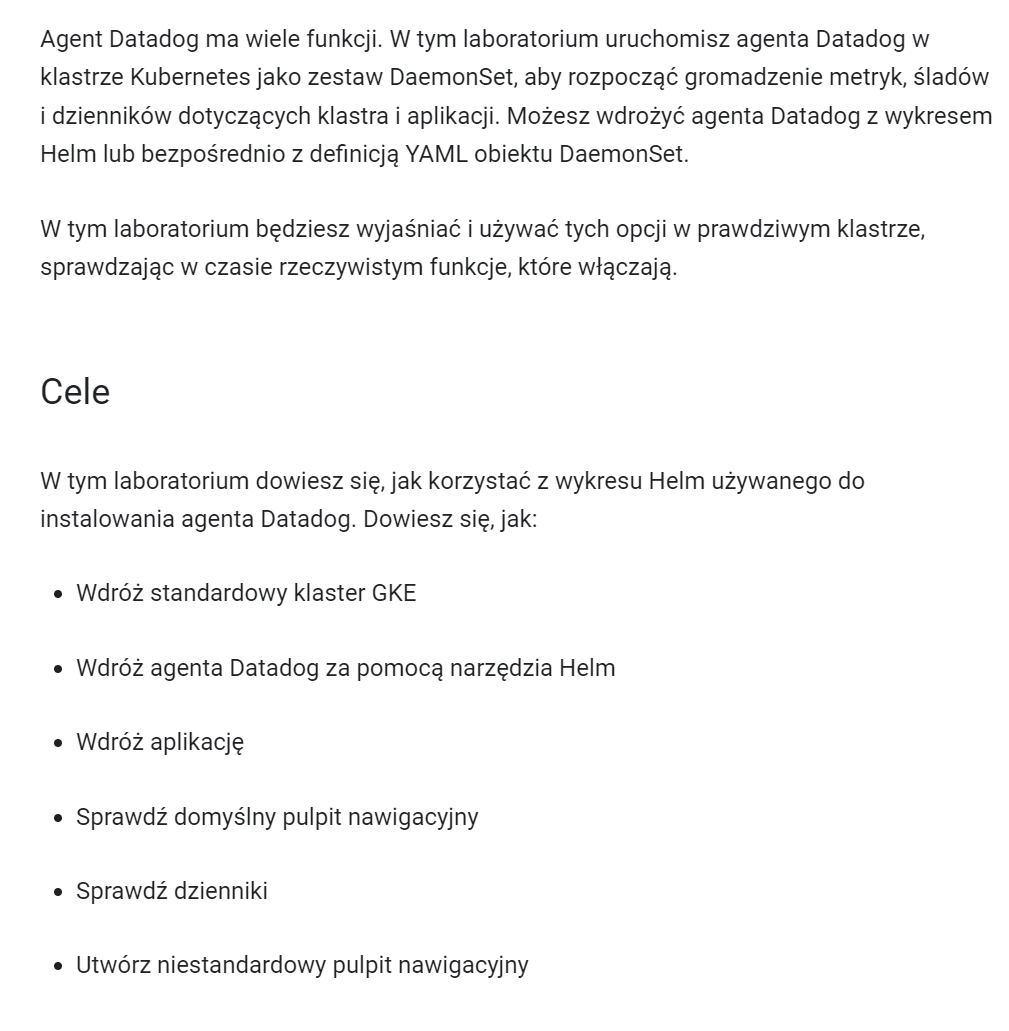

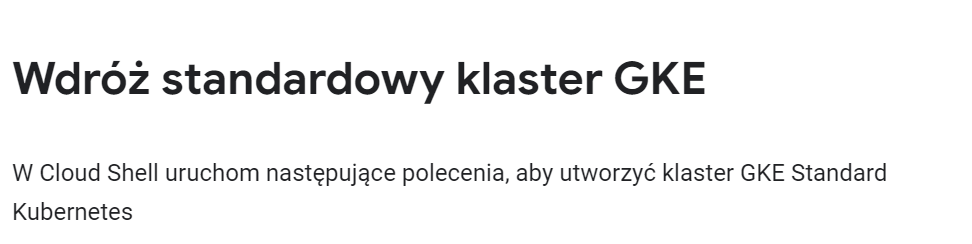

In [ ]:
gcloud container clusters create "datadog" \
  --machine-type="e2-medium" \
  --num-nodes="2" \
  --zone=us-central1-a

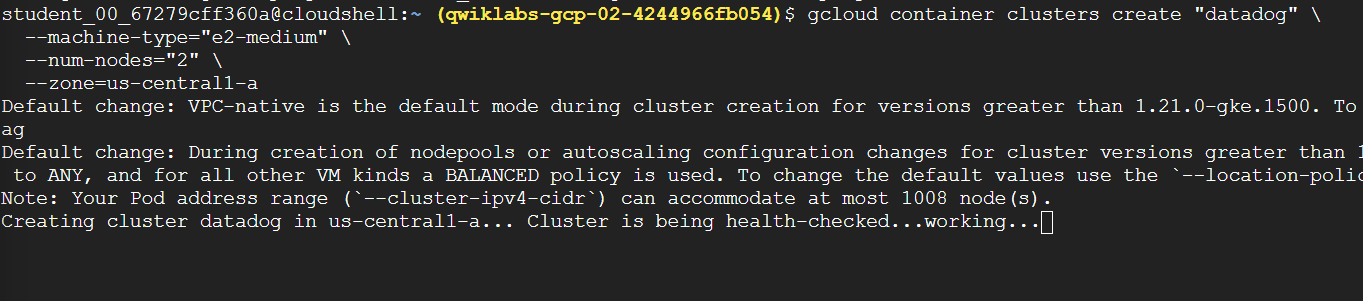

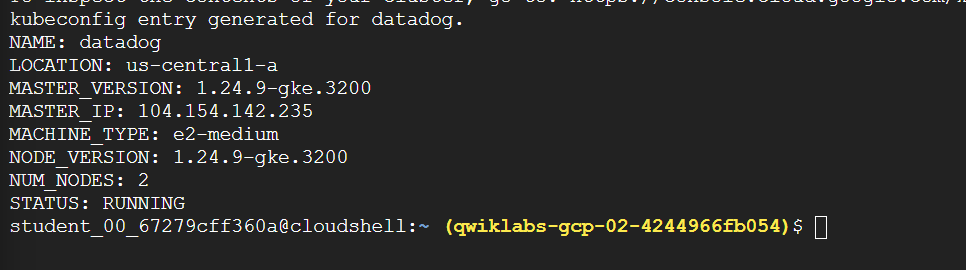

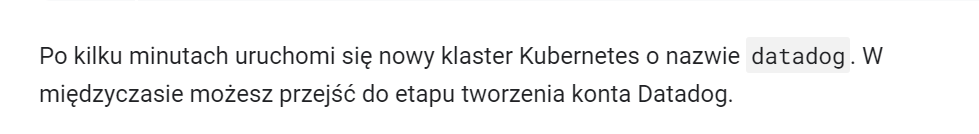

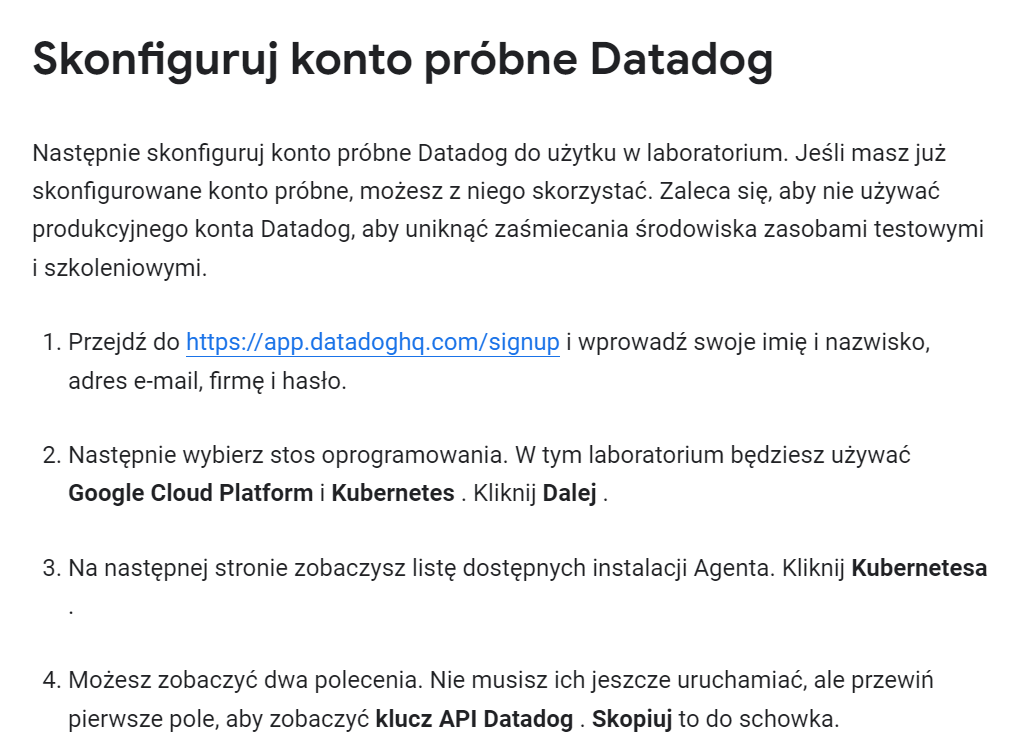

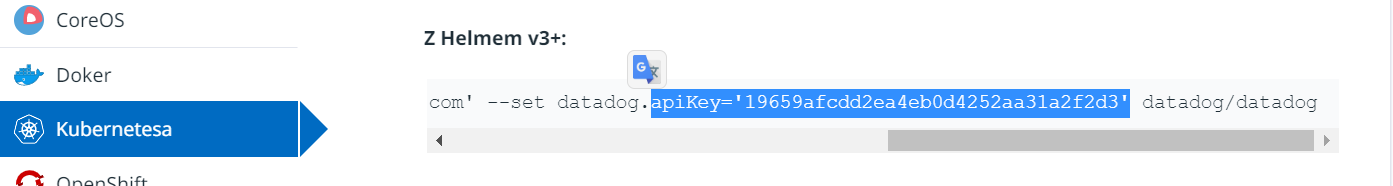

With Helm v3+:

In [ ]:
helm install RELEASE_NAME -f datadog-values.yaml --set datadog.site='datadoghq.com' --set datadog.apiKey='19659afcdd2ea4eb0d4252aa31a2f2d3' datadog/datadog


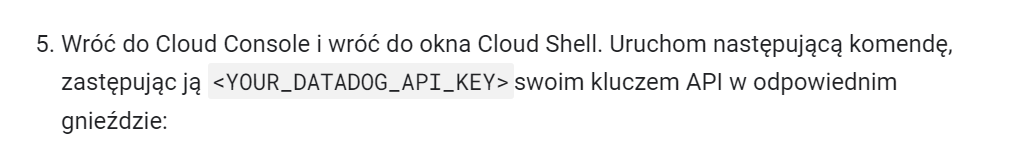

In [ ]:
export DD_API_KEY=19659afcdd2ea4eb0d4252aa31a2f2d3

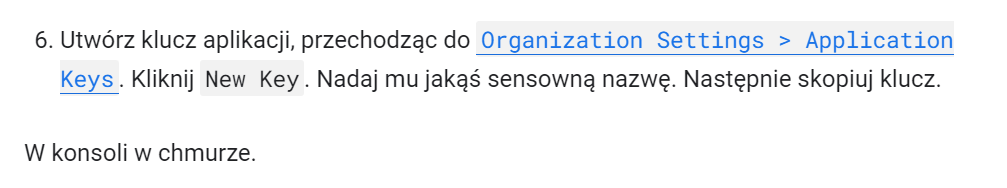

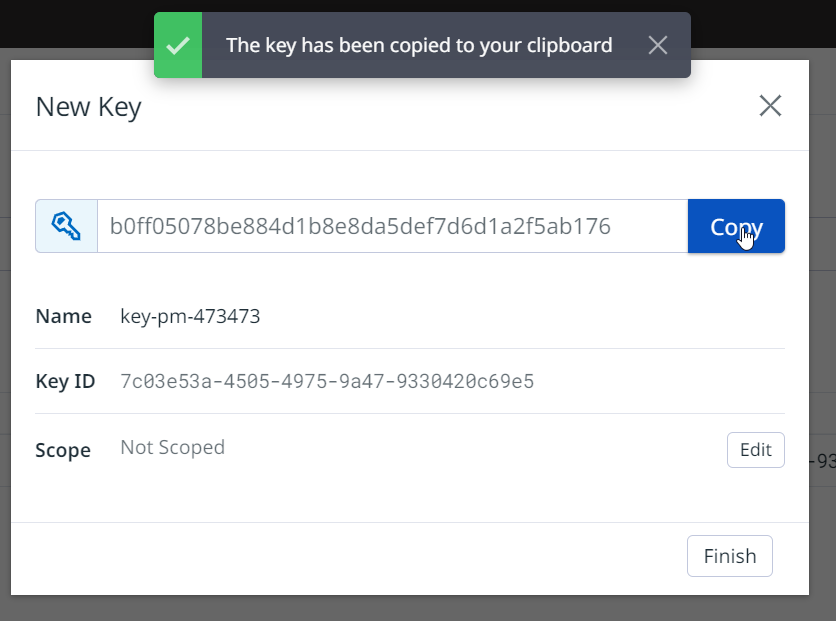

In [ ]:
export DD_APP_KEY=b0ff05078be884d1b8e8da5def7d6d1a2f5ab176

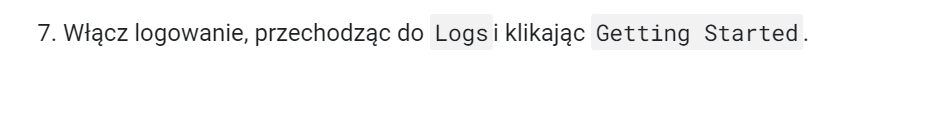

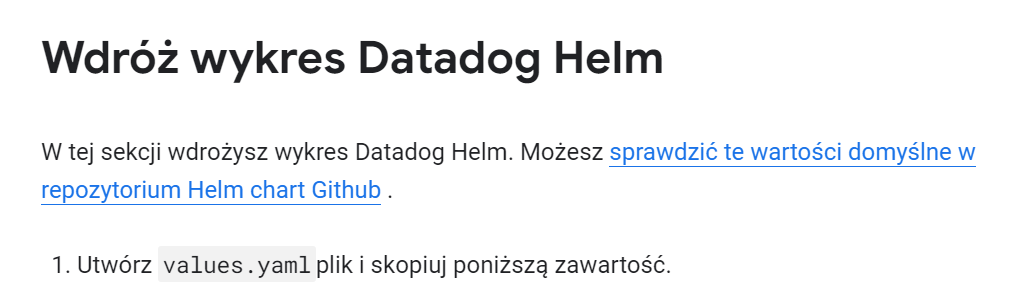

In [ ]:
echo "datadog:
  logs:
    enabled: true
    containerCollectAll: true
clusterAgent:
  enabled: true
  replicas: 2
  createPodDisruptionBudget: true
agents:
  tolerations:
    - key: node-role.kubernetes.io/master
      effect: NoSchedule
clusterChecksRunner:
  env:
    - name: DD_KUBELET_TLS_VERIFY
      value: false" > values.yaml

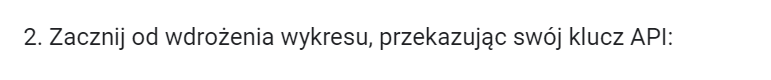

In [ ]:
helm repo add datadog https://helm.datadoghq.com
helm repo update
helm install datadog -f values.yaml  \
    --set datadog.apiKey=$DD_API_KEY \
    --set datadog.appKey=$DD_APP_KEY \
    datadog/datadog

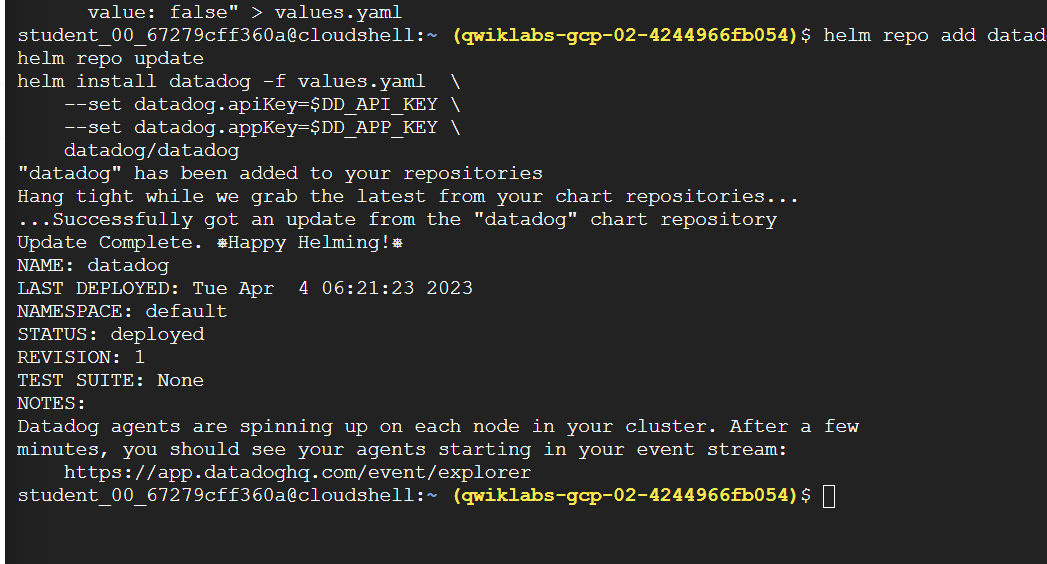

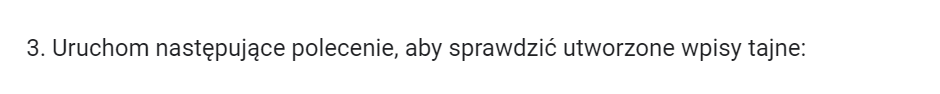

In [ ]:
kubectl get secrets

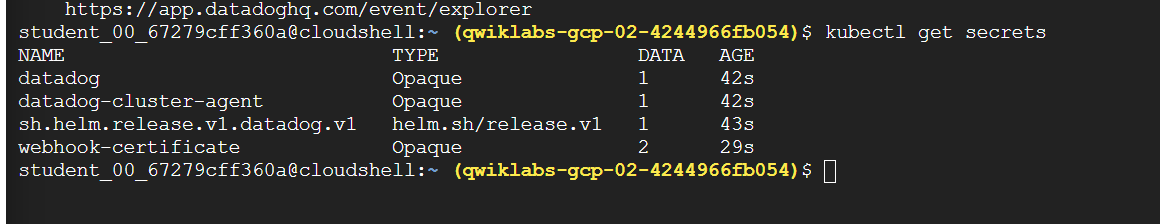

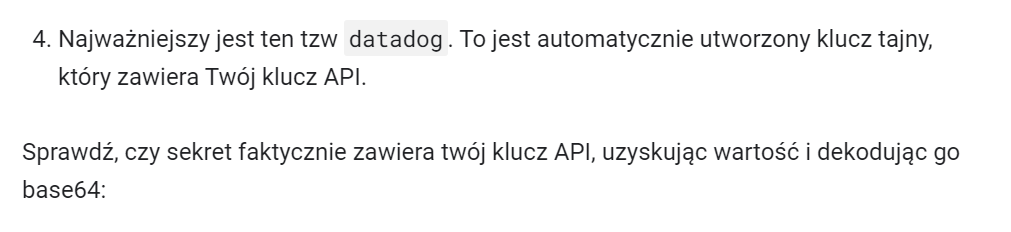

In [ ]:
kubectl get secret datadog --template='{{index .data "api-key"}}' | base64 -d

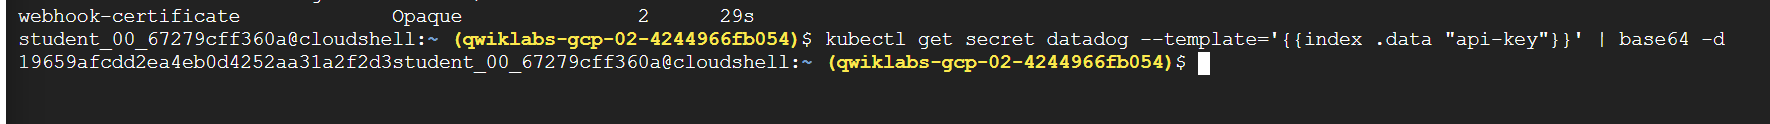

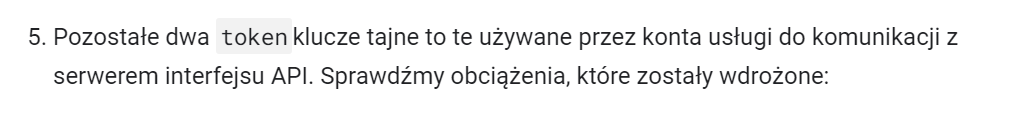

In [ ]:
kubectl get deployments

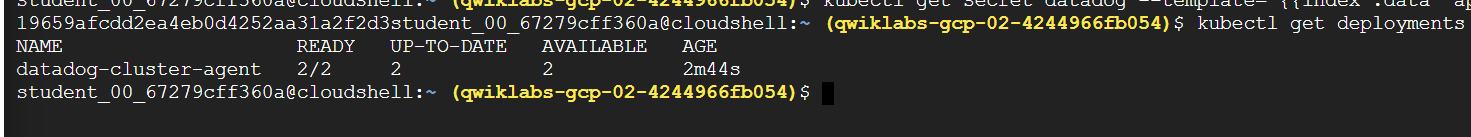

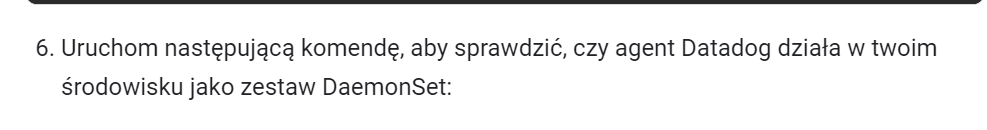

In [ ]:
kubectl get daemonset

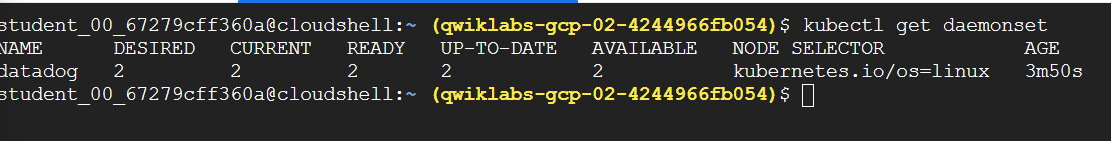

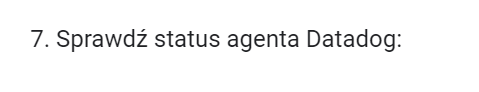

In [ ]:
kubectl exec -ti $(kubectl get pods -l app=datadog -o custom-columns=:metadata.name) -- agent status

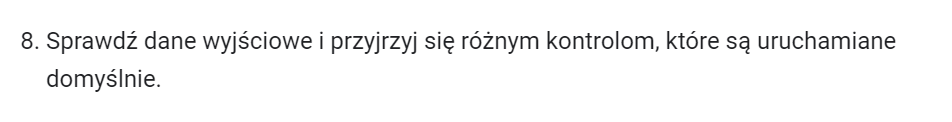

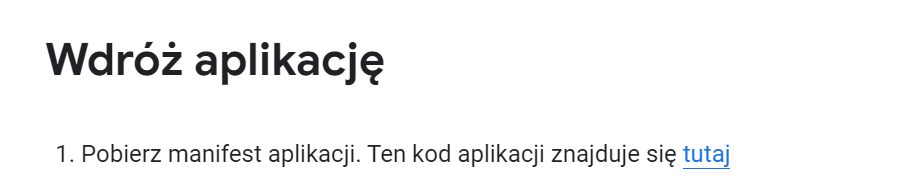

In [ ]:
curl https://raw.githubusercontent.com/GoogleCloudPlatform/microservices-demo/main/release/kubernetes-manifests.yaml -o manifest.yaml

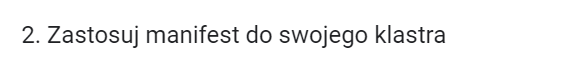

In [ ]:
kubectl apply -f manifest.yaml

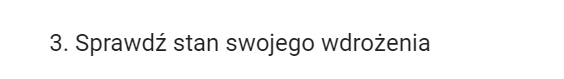

In [ ]:
kubectl get po

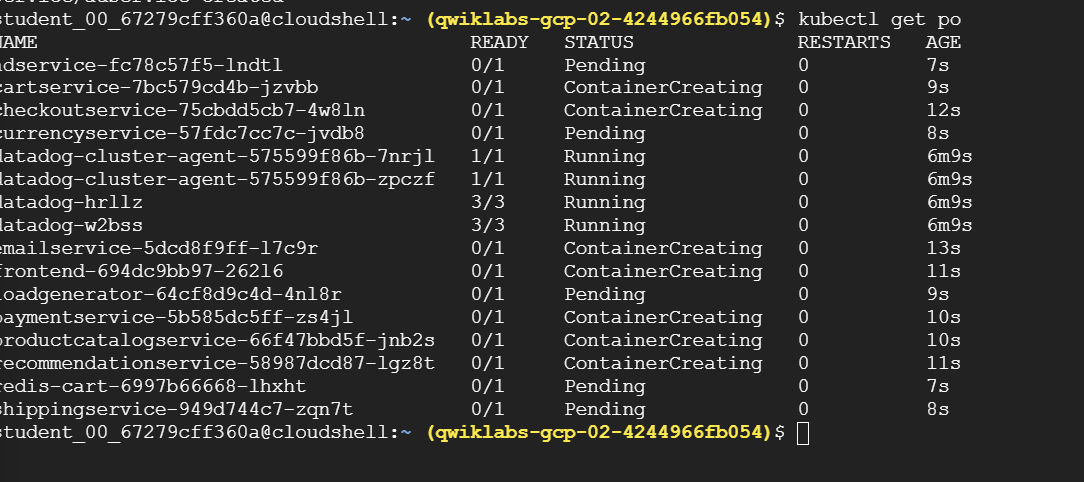

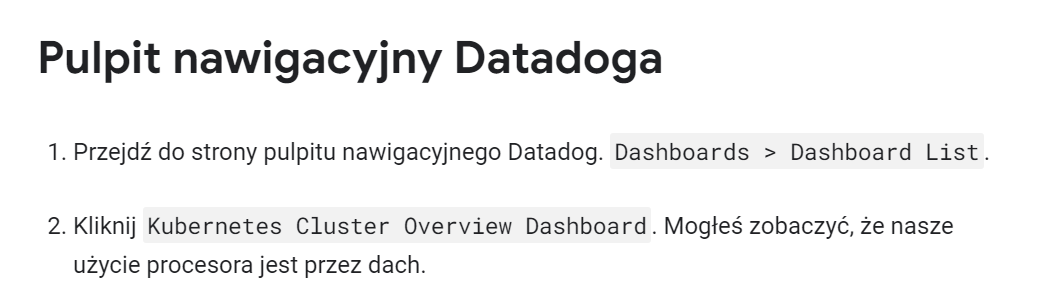

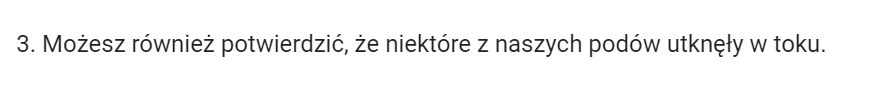

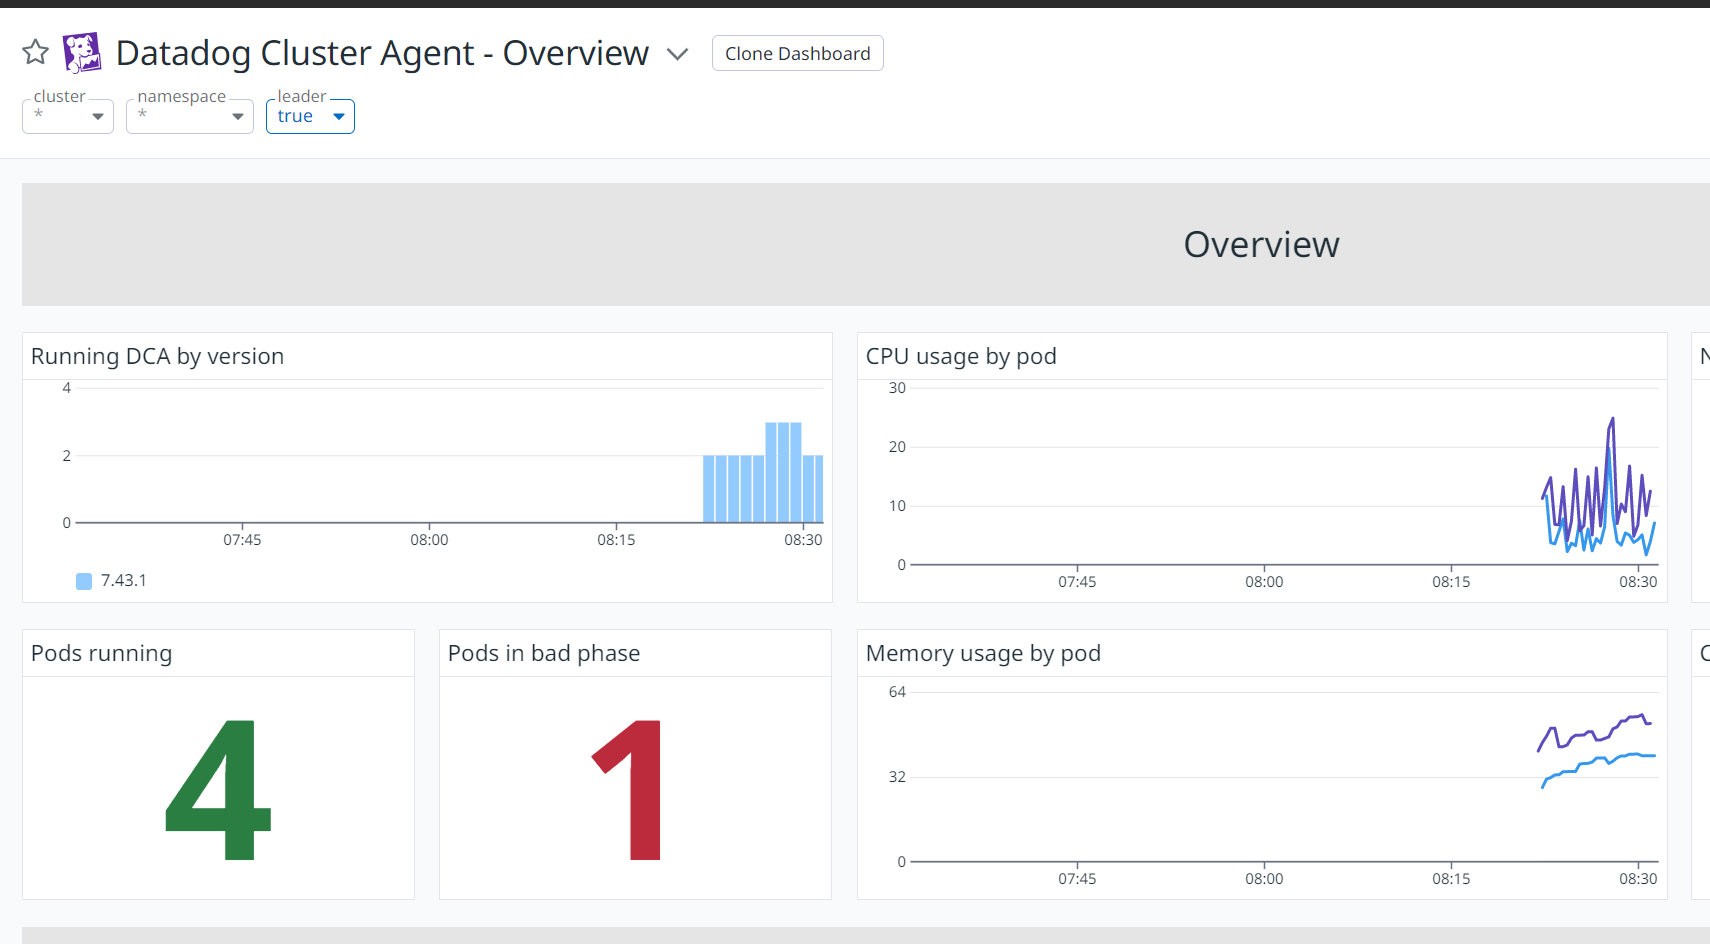

In [ ]:
kubectl get po | grep Pending

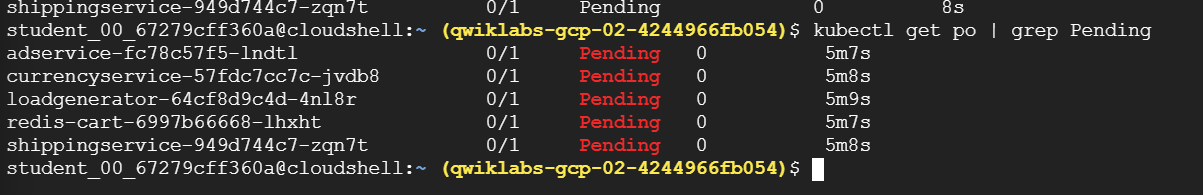

In [ ]:
adservice-694f4ff98-49trp                0/1     Pending   0          4m22s
cartservice-859c54495f-d78p8             0/1     Pending   0          4m24s
loadgenerator-65779994db-mhb24           0/1     Pending   0          4m23s
shippingservice-ff5f4d7d-s974d           0/1     Pending   0          4m23s

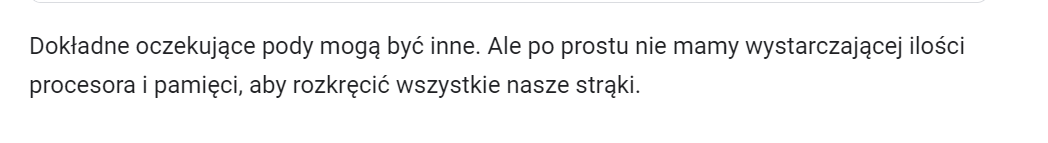

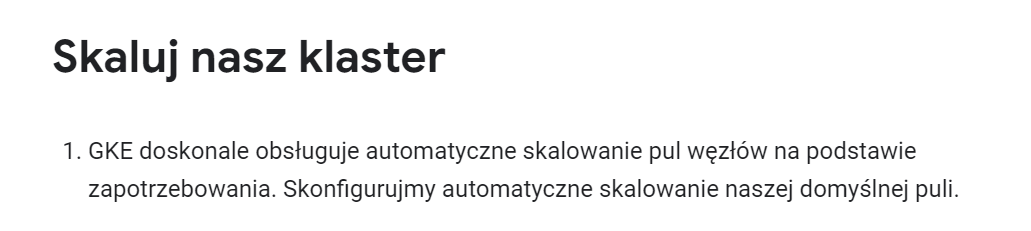

In [ ]:
gcloud container clusters update datadog \
    --enable-autoscaling \
    --node-pool=default-pool \
    --min-nodes=2 \
    --max-nodes=5 \
    --region=us-central1-a

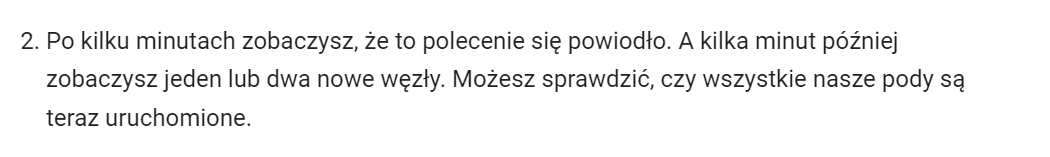

In [ ]:
kubectl get po

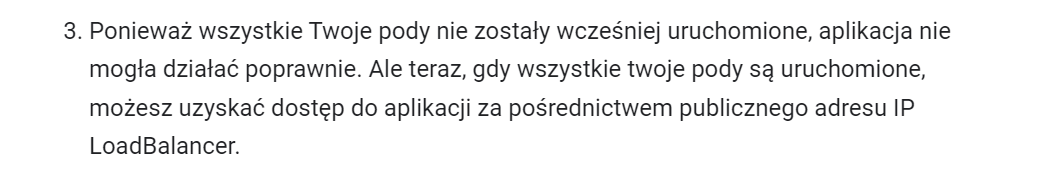

In [ ]:
kubectl get svc frontend-external -o json | jq '.status.loadBalancer.ingress[].ip'

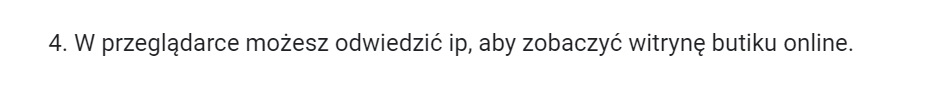

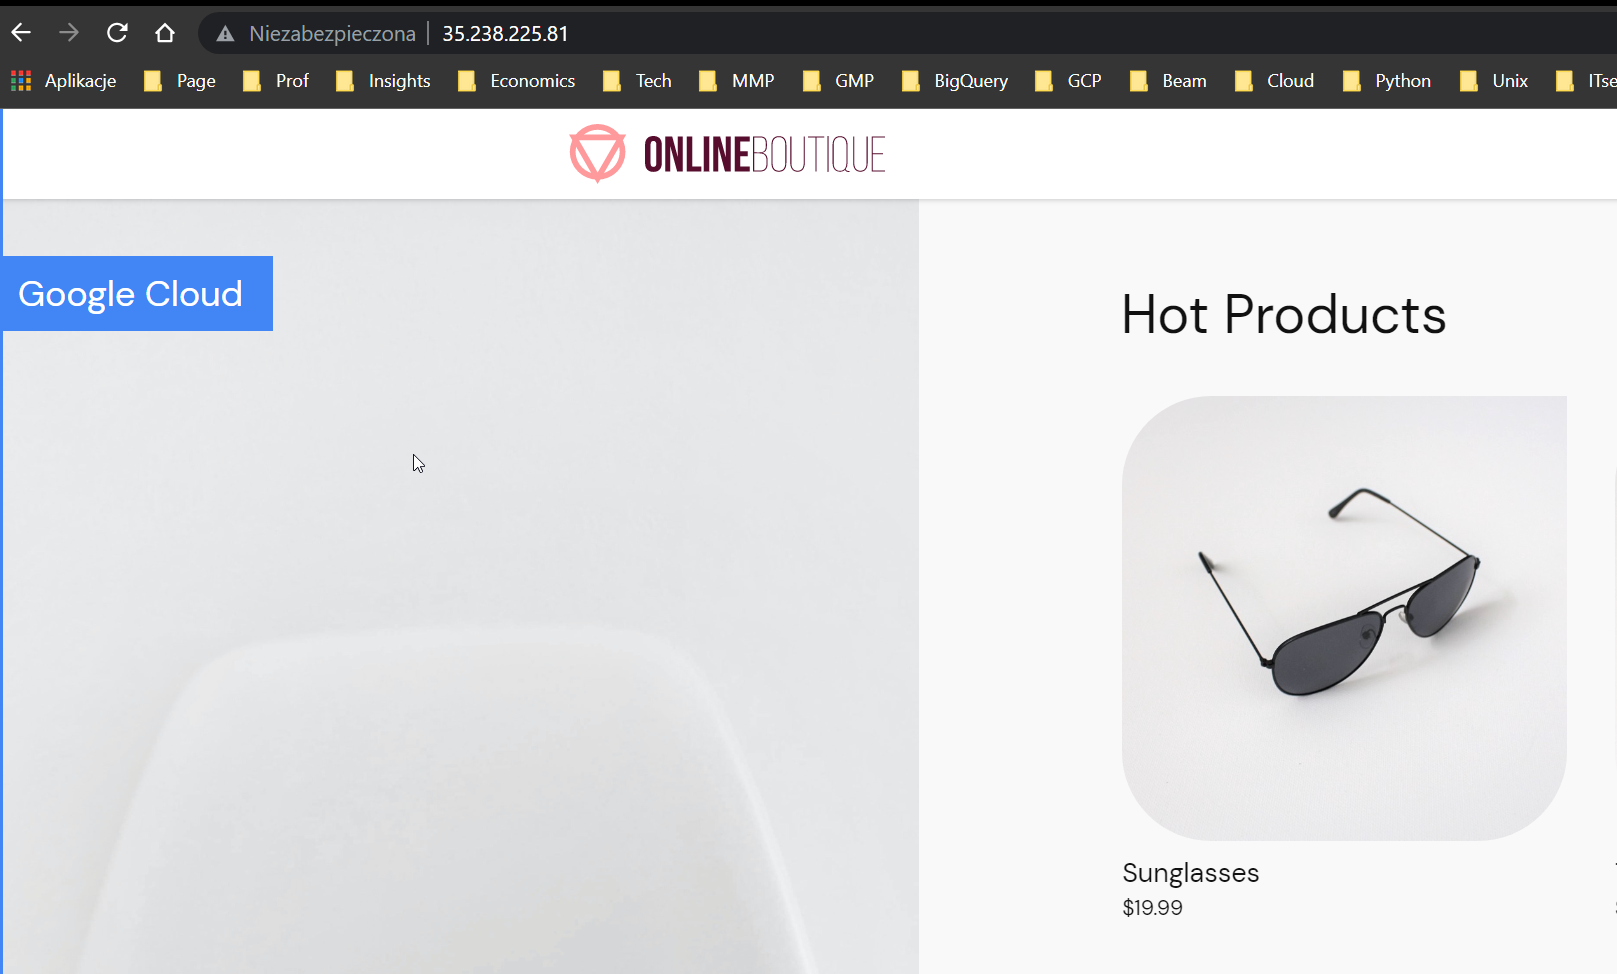

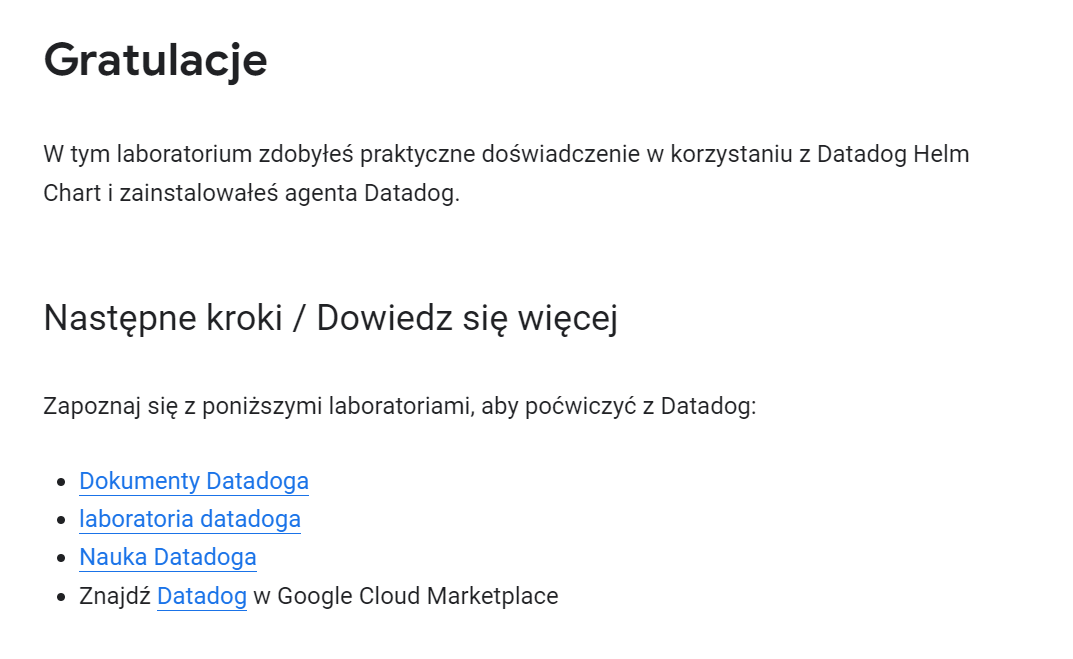